In [1]:
########
##MCMC##
########
'''
this program will help to find the convergence rate of MCMC, in term of magnetic moment
author: Hao SUN
email: sunhopht@gmail.com
'''

import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
random.seed(123)#for duplication



now = datetime.datetime.now()
#the start time

I =15
J =15
#I,J  are the shape of the simulated optical lattice

A = np.empty((I,J))
for i in range(I):
    for j in range(J):
        A[i,j]= 1
        
        
JKBTMAX = 5 #range of temperature 
Steplen = 0.1 # step length


T = int(JKBTMAX/Steplen) #the number of temperature 
M = np.empty((10,T))#the average magnetic moment for every 10 percent result of each T
for i in range(10):
    for t in range(T):
        M[i,t] = 0


cycle = 500 #cycle times for each point on average
W =cycle #total cycle times for each T
####################
PLT = np.zeros((T,cycle,I,J))
####################
for jkbt in range(T):
    Temp = jkbt
    #Temp = T -1 - JKBT
    for w in range(W):
        for i in range(I):
            for j in range(J):
                A[i,j]=-A[i,j]
                if i==0:
                    im=I-1
                else:
                    im=i-1
                if i==I-1:
                    ip=0
                else:
                    ip=i+1
                if j==0:
                    jm=J-1
                else:
                    jm=j-1
                if j==J-1:
                    jp=0
                else:
                    jp=j+1


                dE =-2* (A[i,j]*A[ip,j]+A[i,j]*A[i,jp]+A[i,j]*A[im,j]+A[i,j]*A[i,jm])
                if dE<0:
                    A[i,j] = A[i,j]
                else:
                    if np.exp(-dE/(Temp*Steplen))<random.uniform(0,1):
                        A[i,j] = -A[i,j]
        PLT[jkbt,w,:,:] = A[:,:] 
        M[np.floor((w)*10/W),jkbt]+= np.sum(A)
    M[:,jkbt] /= (W/10)
end = datetime.datetime.now()
print("time:",(end-now).total_seconds())

ii = range(T)
ii = np.asarray(ii)
T_ =(ii[:]*Steplen)
Onsager= I*J*(1-np.sinh(2/T_)**(-4))**0.125
for i in range(len(Onsager)):
    if np.isnan(Onsager[i]):
        Onsager[i]=0

#this is the Onsager solution

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:76: RuntimeWarning: divide by zero encountered in double_scalars
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


time: 45.968696


/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:87: RuntimeWarning: divide by zero encountered in true_divide
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:87: RuntimeWarning: invalid value encountered in power


Error: 192.851261442


/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


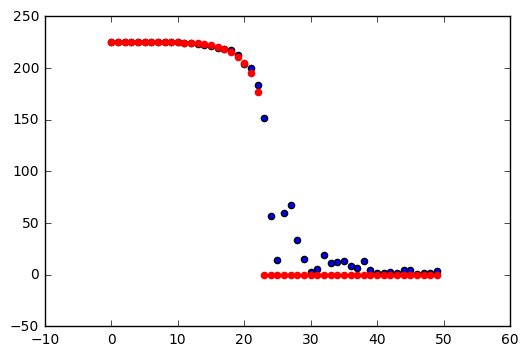

Error: 226.46862931


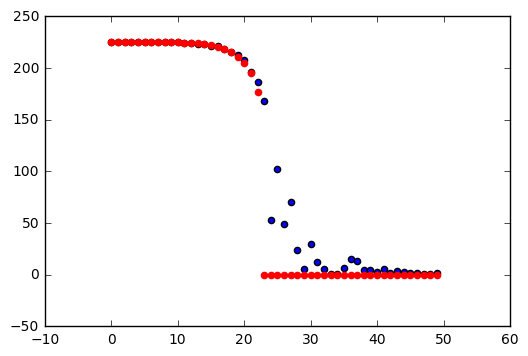

Error: 194.092789997


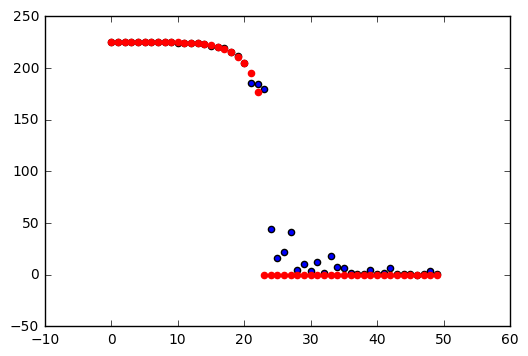

Error: 218.305056544


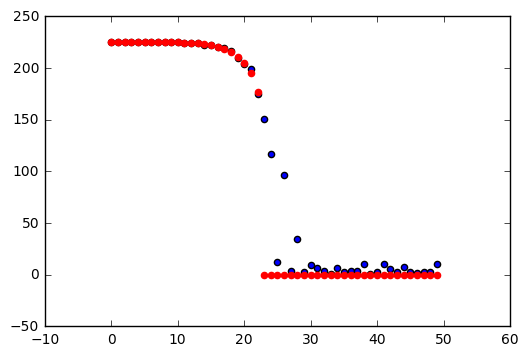

Error: 148.409483032


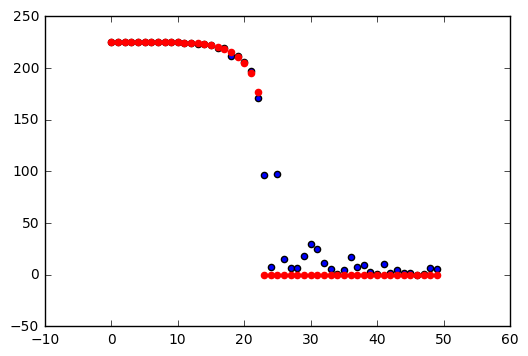

Error: 218.01477787


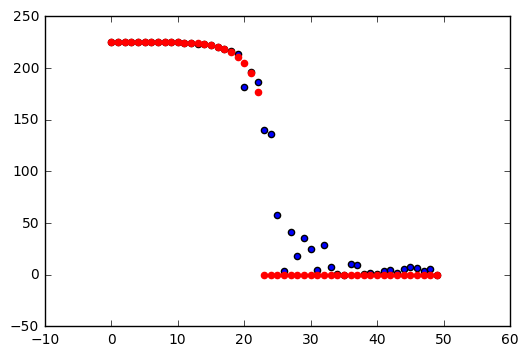

Error: 283.408759963


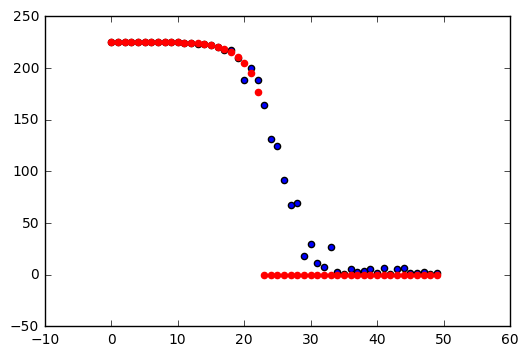

Error: 205.375853602


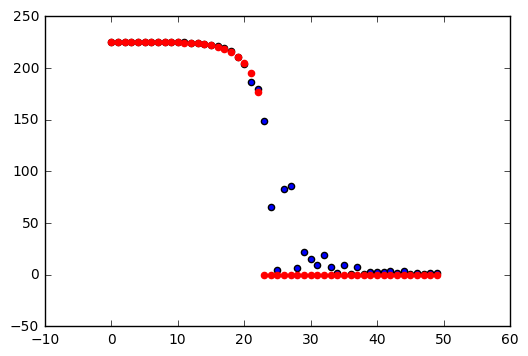

Error: 221.661572348


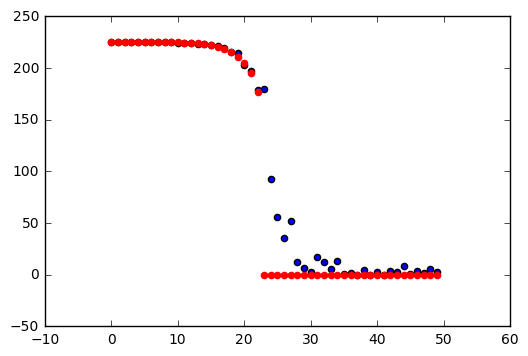

Error: 192.332883938


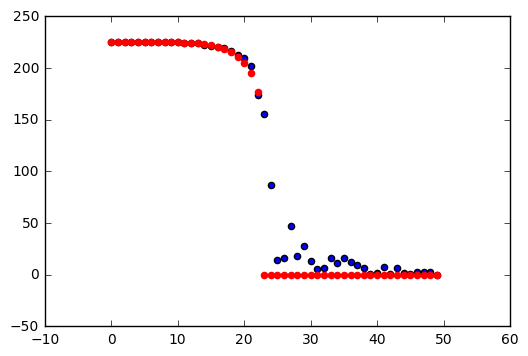

Err_mean : 210.092106805


In [2]:
ii = range(T)
ii = np.asarray(ii)
T_ =(ii[:]*Steplen)
Onsager= I*J*(1-np.sinh(2/T_)**(-4))**0.125
for i in range(len(Onsager)):
    if np.isnan(Onsager[i]):
        Onsager[i]=0
Err_sum = 0
for i in range(10):

    print("Error:",np.sqrt(np.sum((np.abs(M[i,:]) - np.abs(Onsager))**2)))
    Err_sum += np.sqrt(np.sum((np.abs(M[i,:]) - np.abs(Onsager))**2))
    plt.scatter(ii,np.abs(M[i,:]))
    plt.scatter(ii,Onsager,color='red')
    plt.show()
    

print("Err_mean :",Err_sum/10)

In [3]:
for t in range(T):
    for i in range(int(cycle/5)):
        np.save('/Users/sunhop/Desktop/HMC_MCMC/fig_MCMC_S/'+ str(t)+ ','+ str(i) , PLT[t,400+i,:,:])

In [4]:
for t in range(T):
    for i in range(int(cycle/5)):
        plt.imshow(PLT[t,400+i,:,:])
        plt.savefig('/Users/sunhop/Desktop/HMC_MCMC/FMC_S/'+ str(t)+ ','+ str(i) )
        

KeyboardInterrupt: 

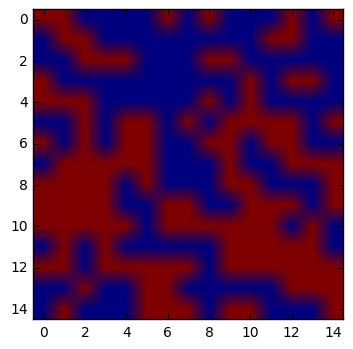

In [5]:
plt.imshow(PLT[49,400,:,:])
plt.show()